In [43]:
# Setup .venv and install dependencies

# python3 -m venv .venv

In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import Titanic Train and Test CSV files

In [4]:
import pandas as pd
import numpy as np

titanic_test = pd.read_csv('test.csv')
titanic_train = pd.read_csv('train.csv')


# Show first five rows and 3 columns of dataframs

In [8]:
titanic_test.iloc[:5, :3]

,PassengerId,Pclass,Name
0,892,3,"Kelly, Mr. James"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)"
2,894,2,"Myles, Mr. Thomas Francis"
3,895,3,"Wirz, Mr. Albert"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


In [9]:
titanic_train.iloc[:5, :3]  

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


# Scatter Plot for 2D data, For Age and and Fare in Training Data, Try to conclude both relationships 

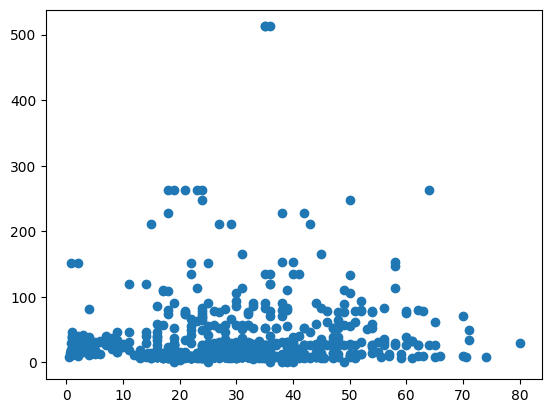

In [10]:
import matplotlib.pyplot as plt

plt.scatter(titanic_train['Age'], titanic_train['Fare'])

# Check for missing values in both Train and Test

In [11]:
# missing values in train dataset

titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# missing values in test dataset

titanic_test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


# How Much memory is used by Train and Test DataFram

In [13]:
# memory usage of train dataset

titanic_train.memory_usage()

Index           132
PassengerId    7128
Survived       7128
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
dtype: int64

In [14]:
# memory usage of test dataset

titanic_test.memory_usage()

Index           132
PassengerId    3344
Pclass         3344
Name           3344
Sex            3344
Age            3344
SibSp          3344
Parch          3344
Ticket         3344
Fare           3344
Cabin          3344
Embarked       3344
dtype: int64

# Number of null values in each features in both files

In [15]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Find the total number of missing values from the both datafram

In [17]:
total = titanic_train.isnull().sum().sort_values(ascending=False)
total += titanic_test.isnull().sum().sort_values(ascending=False)

total

Cabin          1014.0
Age             263.0
Embarked          2.0
PassengerId       0.0
Name              0.0
Pclass            0.0
Survived          NaN
Sex               0.0
Parch             0.0
SibSp             0.0
Fare              1.0
Ticket            0.0
dtype: float64

# Visualise the mising value heatmap

<Axes: >

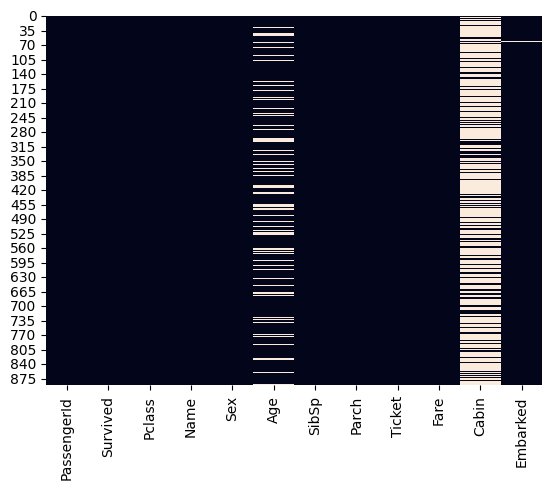

In [18]:
# missing value heatmap

import seaborn as sns

sns.heatmap(titanic_train.isnull(), cbar=False)

# Check Data Distribution of Fare, Age and mention their distributions

<Axes: xlabel='Age', ylabel='Count'>

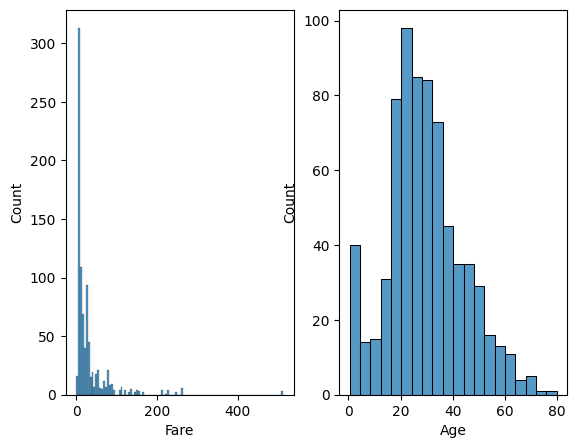

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.histplot(titanic_train['Fare'])
plt.subplot(1, 3, 2)
sns.histplot(titanic_train['Age'])

# Deletion of Missing Data
# Remove rows with any missing values from both datafram and save in different datafram and keep orignal one for further processing 

In [20]:
clean_test = titanic_test.dropna()

In [21]:
clean_train = titanic_train.dropna()

# Mean/Median Imputation
# Fill missing values with the mean of the column, If you are getting error let me know and try to explain why this error happening and if there is no error explain it why their is no error

In [24]:
# Test dataset
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)

titanic_test['Age'].isnull().sum()

/var/folders/tt/1wm0x7wj6sg2zfqbrjhzrtrc0000gn/T/ipykernel_50596/996765558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)


np.int64(0)

In [26]:
# Train dataset
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)

titanic_train['Age'].isnull().sum()

/var/folders/tt/1wm0x7wj6sg2zfqbrjhzrtrc0000gn/T/ipykernel_50596/967219610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)


np.int64(0)

In [27]:
# explination why no error
# use of inplace=True in fillna() method 

# Do same thing using IterativeImputer

In [28]:
# use iterative imputer to fill missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

titanic_train['Age'] = imputer.fit_transform(titanic_train[['Age']])
titanic_test['Age'] = imputer.fit_transform(titanic_test[['Age']])

train_null = titanic_train.isnull().sum()
test_null = titanic_test.isnull().sum()

print({'train_null': train_null, 'test_null': test_null})


{'train_null': PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64, 'test_null': PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64}


# Merge both dataset (How you will combine them perfectly?)

In [30]:
# best way is to use pandas concat() method


In [31]:
titanic = pd.concat([titanic_train, titanic_test], axis=0)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S
